# Drawing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
import skimage
import skimage.draw

%matplotlib widget

# %matplotlib inline

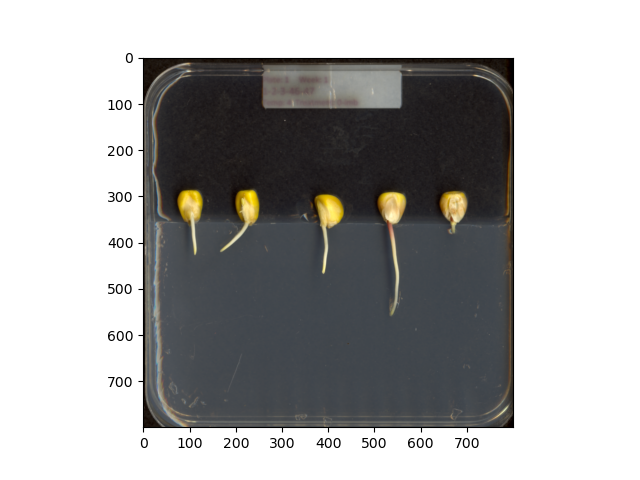

In [2]:
maize_seedlings = iio.imread(uri="data/maize-seedlings.tif")

fig, ax = plt.subplots()
plt.imshow(maize_seedlings)

In [3]:
left_upper = (357, 44)
right_lower = (740, 720)

In [4]:
# Create a basic mask
mask = np.ones(shape=maize_seedlings.shape[0:2], dtype="bool")

mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [5]:
# Draw a filled rectangle on the mask image
rows, columns = skimage.draw.rectangle(start=(357, 44), end=(740, 720))

In [6]:
columns

array([[ 44,  44,  44, ...,  44,  44,  44],
       [ 45,  45,  45, ...,  45,  45,  45],
       [ 46,  46,  46, ...,  46,  46,  46],
       ...,
       [718, 718, 718, ..., 718, 718, 718],
       [719, 719, 719, ..., 719, 719, 719],
       [720, 720, 720, ..., 720, 720, 720]])

In [7]:
mask[rows, columns] = False

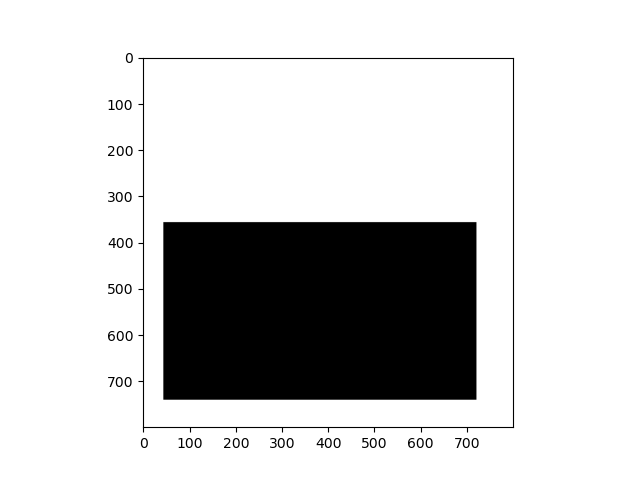

In [8]:
# Display the mask image
fig, ax = plt.subplots()
plt.imshow(mask, cmap="gray")

In [9]:
canvas =np.zeros(shape=(600, 800, 3), dtype="uint8")

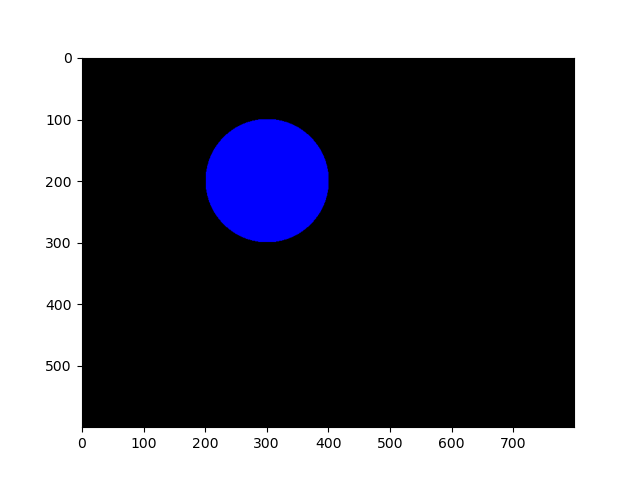

In [10]:
rows, columns = skimage.draw.disk(center=(200, 300), radius=100,
                                  shape=canvas.shape[0:2])
canvas[rows, columns] = (0, 0, 255)

fig, ax = plt.subplots()
plt.imshow(canvas)

In [11]:
rows, columns = skimage.draw.line(r0=400, c0=200, r1=500, c1=700)

In [12]:
canvas[rows, columns] = (0, 255, 0)

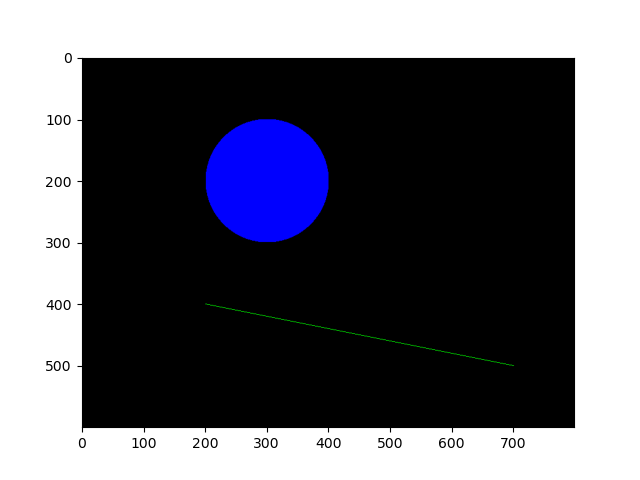

In [13]:
fig, ax= plt.subplots()
plt.imshow(canvas)

In [14]:
# load the original image
maize_seedlings2 = iio.imread(uri="data/maize-seedlings.tif")

# create the basic mask
mask = np.ones(shape=maize_seedlings2.shape[0:2], dtype="bool")

rows, columns = skimage.draw.rectangle(start=(357, 44), end=(740,720))
mask[rows, columns] = False

In [15]:
maize_seedlings2[mask] = 0

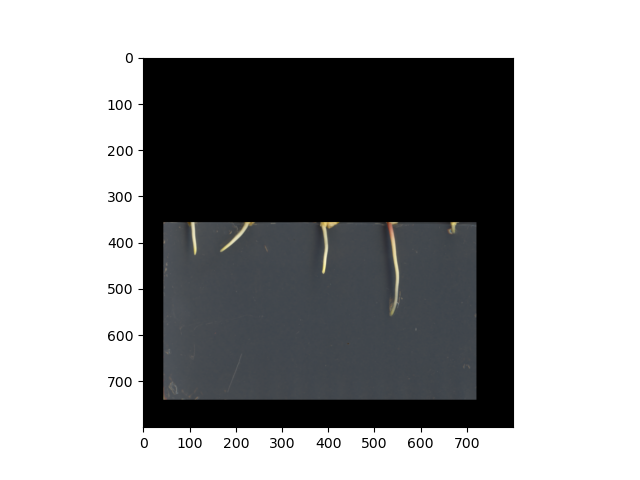

In [16]:
fig, ax= plt.subplots()
plt.imshow(maize_seedlings2)

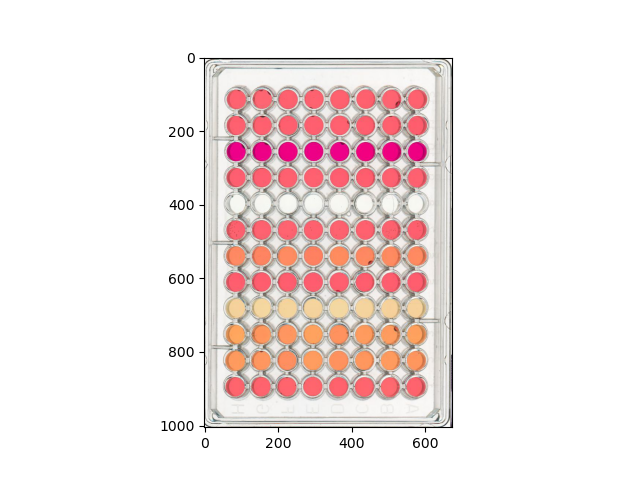

In [17]:
# load the image
wellplate = iio.imread(uri="data/wellplate-01.jpg")
wellplate = np.array(wellplate)

# DIsplay the image
fig, ax = plt.subplots()
plt.imshow(wellplate)

In [18]:
wellplate_mask = np.ones(shape=wellplate.shape[0:2], dtype="bool")

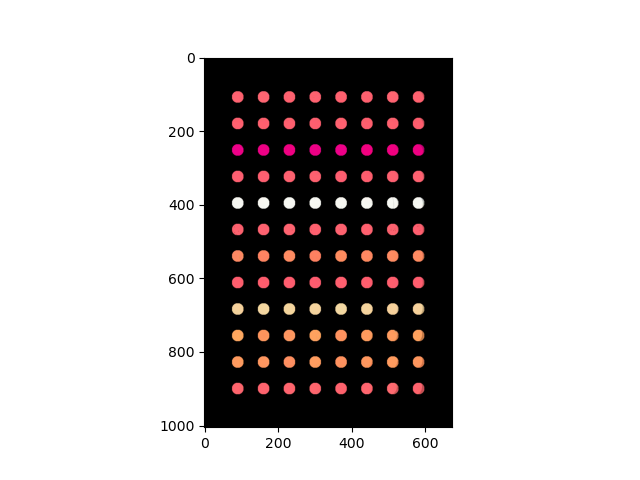

In [21]:
with open("data/centers.txt", "r") as center_file:
    for line in center_file:
        # Getting the coordinates of each well
        coordinates = line.split()
        cx = int(coordinates[0])
        ry = int(coordinates[1])
        
        rows, columns = skimage.draw.disk(center=(ry, cx),
                                          radius=16,
                                          shape=wellplate.shape[0:2])
        wellplate_mask[rows, columns] = False
        
wellplate[wellplate_mask] = 0

fig, ax = plt.subplots()
plt.imshow(wellplate)

# Break until 15:00!

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.

